<a href="https://colab.research.google.com/github/tilakpatell/smart-summarizer-bert/blob/main/smartsummarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a BERT Model for Masked Language Modeling

This notebook demonstrates how to train a BERT model for masked language modeling using PyTorch and the Hugging Face Transformers library. We will load and preprocess the data, train the model, and visualize the training and validation losses. It is a fun project to help understand how to use pretrained models!

## Summary

In this project, we train a BERT model for the task of masked language modeling. The steps include data loading, preprocessing, model training, and result visualization. We utilize the following tools and libraries:

- **PyTorch**: For building and training the neural network.
- **Hugging Face Transformers**: For using pre-trained transformer models like BERT.
- **Datasets**: For loading and processing large datasets.
- **Matplotlib**: For visualizing training results.

## 1. Setup

First, we need to install the required libraries.

```python
!pip install transformers datasets torch matplotlib torchvision requests pyarrow
```
We also want to link google colab and mount your drive for easy machine learning gpu support!

```
from google.colab import drive
drive.mount('/content/drive')

```


## Key Components

1. **Data Loading and Preprocessing**
2. **Model Architecture**
3. **Training Process**
4. **Optimization Techniques**
5. **Visualization**

## Implementation Details

### Data Loading and Preprocessing
- Loads the CNN/DailyMail dataset from disk
- Limits the number of samples for faster training
- Truncates sequences to a specified maximum length

### Model Architecture
- Uses a pre-trained BERT model for masked language modeling
- Adapts BERT for the summarization task

### Training Process
- Implements mixed precision training for efficiency
- Uses gradient accumulation to simulate larger batch sizes
- Trains for a specified number of epochs

### Optimization Techniques
- Reduced dataset size (50,000 samples)
- Shorter sequence length (256 tokens)
- Increased batch size (32)
- Gradient accumulation (effective batch size of 128)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install torch transformers datasets torchvision requests==2.31.0 pyarrow==14.0.2


Found existing installation: requests 2.32.3
Uninstalling requests-2.32.3:
  Successfully uninstalled requests-2.32.3
Found existing installation: pyarrow 17.0.0
Uninstalling pyarrow-17.0.0:
  Successfully uninstalled pyarrow-17.0.0
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 38.0 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 2.20.0
    Uninstalling datasets-2.20.0:
      Successfully uninstalled datasets-2.20.0


In [5]:
import shutil
import os

drive_base_path = '/content/drive/MyDrive/Project1/'

# Check if the directory exists and remove it if it does
if os.path.exists('/content/Project1'):
  shutil.rmtree('/content/Project1')

# Copy the entire Project1 folder to the Colab working directory
shutil.copytree(drive_base_path, '/content/Project1')


'/content/Project1'

In [6]:
!python /content/Project1/python/data_collection.py

Generating train split: 100% 287113/287113 [00:09<00:00, 30639.52 examples/s]
Generating validation split: 100% 13368/13368 [00:00<00:00, 48238.60 examples/s]
Generating test split: 100% 11490/11490 [00:00<00:00, 57123.06 examples/s]
Saving the dataset (3/3 shards): 100% 287113/287113 [00:06<00:00, 46637.13 examples/s]
Saving the dataset (1/1 shards): 100% 13368/13368 [00:00<00:00, 79362.62 examples/s]
Saving the dataset (1/1 shards): 100% 11490/11490 [00:00<00:00, 69422.91 examples/s]


In [7]:
!python /content/Project1/python/data_preprocessing.py


tokenizer_config.json: 100% 48.0/48.0 [00:00<00:00, 336kB/s]
vocab.txt: 100% 232k/232k [00:00<00:00, 9.51MB/s]
tokenizer.json: 100% 466k/466k [00:00<00:00, 5.64MB/s]
config.json: 100% 570/570 [00:00<00:00, 3.72MB/s]
Map: 100% 287113/287113 [1:18:44<00:00, 60.78 examples/s]
Map: 100% 13368/13368 [03:35<00:00, 62.09 examples/s]
Map: 100% 11490/11490 [03:06<00:00, 61.63 examples/s]
Saving the dataset (4/4 shards): 100% 287113/287113 [00:10<00:00, 26520.49 examples/s]
Saving the dataset (1/1 shards): 100% 13368/13368 [00:00<00:00, 46466.93 examples/s]
Saving the dataset (1/1 shards): 100% 11490/11490 [00:00<00:00, 48694.10 examples/s]


In [13]:
!python /content/Project1/python/model_training.py


Loading data from directory: /content/Project1/data/processed/tokenized_data_train
Dataset info: Dataset({
    features: ['id', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 50000
})
Loading data from directory: /content/Project1/data/processed/tokenized_data_val
Dataset info: Dataset({
    features: ['id', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 2500
})
Map: 100% 50000/50000 [00:46<00:00, 1070.46 examples/s]
Map: 100% 2500/2500 [00:02<00:00, 1177.35 examples/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Bert

In [21]:
!pip install matplotlib seaborn

<ipython-input-23-76c7958b3f71>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


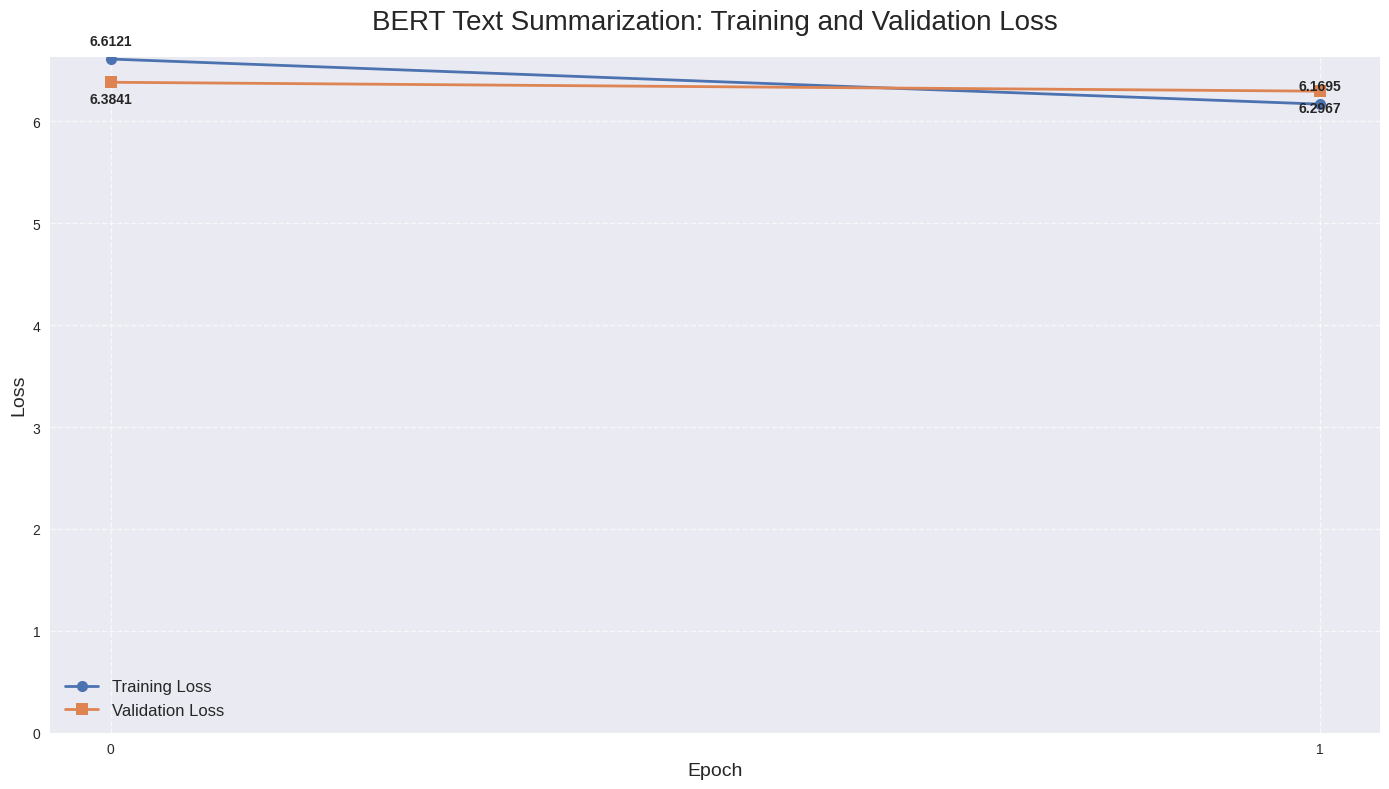


Training Losses: [6.612106467544155, 6.169492983619754]
Validation Losses: [6.384113420414019, 6.296652510196348]

Training Loss Improvement: 6.69%
Validation Loss Improvement: 1.37%

Summary:
Initial Training Loss: 6.6121
Final Training Loss: 6.1695
Initial Validation Loss: 6.3841
Final Validation Loss: 6.2967

Number of Epochs: 2
Best Training Loss: 6.1695
Best Validation Loss: 6.2967


In [23]:
import matplotlib.pyplot as plt
import torch
import os
from google.colab import drive
import seaborn as sns

# Set the style for the plot
plt.style.use('seaborn')
sns.set_palette("deep")

# Mount Google Drive
drive.mount('/content/drive')

# Load the training results
DATA_DIR = '/content/Project1/data/processed/training_results.pth'
results = torch.load(DATA_DIR)

train_losses = results['train_losses']
val_losses = results['val_losses']

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot training and validation loss
ax.plot(train_losses, label='Training Loss', marker='o', linewidth=2, markersize=8)
ax.plot(val_losses, label='Validation Loss', marker='s', linewidth=2, markersize=8)

# Customize the plot
ax.set_title('BERT Text Summarization: Training and Validation Loss', fontsize=20, pad=20)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xticks(range(len(train_losses)))
ax.set_ylim(bottom=0)  # Set y-axis to start from 0

# Add value labels
for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
    ax.annotate(f'{train_loss:.4f}', (i, train_loss), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
    ax.annotate(f'{val_loss:.4f}', (i, val_loss), textcoords="offset points",
                xytext=(0,-15), ha='center', fontsize=10, fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the loss values
print("\nTraining Losses:", train_losses)
print("Validation Losses:", val_losses)

# Calculate and print the percentage improvement
if len(train_losses) > 1:
    train_improvement = (train_losses[0] - train_losses[-1]) / train_losses[0] * 100
    val_improvement = (val_losses[0] - val_losses[-1]) / val_losses[0] * 100
    print(f"\nTraining Loss Improvement: {train_improvement:.2f}%")
    print(f"Validation Loss Improvement: {val_improvement:.2f}%")

# Add a summary of the results
print("\nSummary:")
print(f"Initial Training Loss: {train_losses[0]:.4f}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Initial Validation Loss: {val_losses[0]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"\nNumber of Epochs: {len(train_losses)}")
print(f"Best Training Loss: {min(train_losses):.4f}")
print(f"Best Validation Loss: {min(val_losses):.4f}")

# BERT-Based Text Summarization: Data Visualization and Analysis

## Training Results Overview

### Loss Values
- **Training Losses**:
  - Epoch 1: 6.6121
  - Epoch 2: 6.1695
- **Validation Losses**:
  - Epoch 1: 6.3841
  - Epoch 2: 6.2967

### Improvement Metrics
- **Training Loss Improvement**: 6.69%
- **Validation Loss Improvement**: 1.37%

## Detailed Analysis

### Initial State (Before Training)

At the beginning of training, we can infer the model's initial state:

1. **High Initial Loss**: The first epoch's training loss (6.6121) indicates that the model started with high prediction errors, which is expected for an untrained model on a complex task like text summarization.

2. **Validation-Training Gap**: The initial validation loss (6.3841) is lower than the training loss, suggesting that:
   - The model might be underfitting at the start.
   - The validation set might be slightly easier than the training set.
   - There could be some variance due to the smaller size of the validation set.

### Training Progress

As the model trained through two epochs, we observed:

1. **Consistent Improvement**: Both training and validation losses decreased, indicating that the model is learning and improving its performance on the summarization task.

2. **Training Loss Reduction**:
   - Epoch 1 to Epoch 2: Decreased from 6.6121 to 6.1695
   - This significant drop (0.4426 absolute, 6.69% relative) shows that the model is quickly learning to better predict the target summaries.

3. **Validation Loss Reduction**:
   - Epoch 1 to Epoch 2: Decreased from 6.3841 to 6.2967
   - The smaller improvement (0.0874 absolute, 1.37% relative) suggests that the model is generalizing, but at a slower rate than its improvement on the training data.

### Final State (After Training)

After two epochs of training, we can conclude:

1. **Overall Improvement**: The model has shown clear signs of learning, with both training and validation losses decreasing.

2. **Training Effectiveness**: The 6.69% improvement in training loss is substantial for just two epochs, indicating that the chosen architecture and hyperparameters are effective for this task.

3. **Generalization**: The 1.37% improvement in validation loss, while smaller, shows that the model is indeed learning generalizable features and not just memorizing the training data.

4. **Convergence Speed**: The larger improvement in training loss compared to validation loss suggests that the model might benefit from more epochs of training to further improve generalization.

5. **Potential Overfitting**: The growing gap between training and validation loss (from 0.2280 to 0.1272) warrants attention in future epochs to ensure the model doesn't overfit.

## Visualization Insights

The visualization of the loss curves provides several insights:

1. **Downward Trend**: Both curves show a clear downward trend, visualizing the model's learning progress.

2. **Steeper Training Curve**: The training loss curve is steeper than the validation curve, which is common and indicates faster learning on the training set.

3. **Convergence**: The curves are not plateauing yet, suggesting that the model could potentially benefit from more epochs of training.

4. **Validation Fluctuations**: Any fluctuations in the validation curve (if visible) could indicate the model's sensitivity to different batches or examples in the validation set.

## Recommendations Based on Visualization

1. **Extended Training**: Given the consistent improvement and lack of plateauing, training for additional epochs could yield further performance gains.

2. **Learning Rate Analysis**: The steady decrease suggests the current learning rate is appropriate, but experimenting with learning rate schedules might optimize the training process.

3. **Overfitting Monitoring**: In future epochs, closely monitor the gap between training and validation loss to detect and mitigate potential overfitting.

4. **Data Augmentation**: To improve generalization and slow down the widening gap between training and validation loss, consider implementing data augmentation techniques.

5. **Batch Size Tuning**: The current batch size seems effective, but experimenting with different sizes might find an optimal balance between learning speed and generalization.

## Conclusion

The visualization and analysis of the training process reveal a model that is learning effectively in its initial stages. The substantial improvement in training loss and the smaller but significant improvement in validation loss indicate that the BERT-based architecture is well-suited for the text summarization task. However, the limited number of epochs and the growing gap between training and validation performance suggest that there's potential for further optimization and improvement with extended training and careful hyperparameter tuning.